# Data Exploration Notebook

Interactive exploration of the CSV files exported from SQLite databases.

## Overview
- **Dataset 1**: leituras301224_1343_270225_0830 (265,413 rows)
- **Dataset 2**: leituras311024_2031-231224_0730 (438,835 rows)
- **Columns**: 165 columns each (164 numeric, 1 text)
- **Data Type**: Power/electrical readings data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set up paths
csv_dir = Path('../outputs/csv_data')
dataset1_path = csv_dir / 'leituras301224_1343_270225_0830' / 'leituras.csv'
dataset2_path = csv_dir / 'leituras311024_2031-231224_0730' / 'leituras.csv'

print(f"Dataset 1 exists: {dataset1_path.exists()}")
print(f"Dataset 2 exists: {dataset2_path.exists()}")

Dataset 1 exists: True
Dataset 2 exists: True


## Load Sample Data

Since the files are large, we'll load samples for exploration.

In [2]:
# Load samples from both datasets
sample_size = 5000

print("Loading samples...")

# Dataset 1
df1_sample = pd.read_csv(dataset1_path, nrows=sample_size)
print(f"Dataset 1 sample: {len(df1_sample):,} rows, {len(df1_sample.columns)} columns")

# Dataset 2  
df2_sample = pd.read_csv(dataset2_path, nrows=sample_size)
print(f"Dataset 2 sample: {len(df2_sample):,} rows, {len(df2_sample.columns)} columns")

# Show basic info
print("\nColumn names (first 10):")
print(list(df1_sample.columns[:10]))

Loading samples...
Dataset 1 sample: 5,000 rows, 165 columns
Dataset 2 sample: 5,000 rows, 165 columns

Column names (first 10):
['id', 'data_hora', 'ups_work_mode', 'ups_va_in', 'ups_vb_in', 'ups_vc_in', 'ups_hz_in', 'ups_va_out', 'ups_vb_out', 'ups_vc_out']


## Data Structure Analysis

In [3]:
# Check data types and missing values
print("Dataset 1 - Data Types:")
print(df1_sample.dtypes.value_counts())

print("\nDataset 1 - Missing Values:")
missing_1 = df1_sample.isnull().sum()
if missing_1.sum() > 0:
    print(missing_1[missing_1 > 0])
else:
    print("No missing values found")

print("\nDataset 1 - First few rows:")
df1_sample.head()

Dataset 1 - Data Types:
float64    161
int64        3
object       1
Name: count, dtype: int64

Dataset 1 - Missing Values:
No missing values found

Dataset 1 - First few rows:


,id,data_hora,ups_work_mode,ups_va_in,ups_vb_in,ups_vc_in,ups_hz_in,ups_va_out,ups_vb_out,ups_vc_out,...,pdu5_kwh,pdu6_i,pdu6_fp,pdu6_kwh,pdu7_i,pdu7_fp,pdu7_kwh,pdu8_i,pdu8_fp,pdu8_kwh
0,1,2024-12-30 13:43:02,4,232.4,232.5,232.7,59.9,219.2,219.0,219.6,...,5012.6,4.26,0.93,5276.6,4.03,0.99,3880.8,3.22,0.94,3277.8
1,2,2024-12-30 13:43:12,4,232.3,232.6,232.8,59.9,219.0,219.2,219.9,...,5012.6,4.26,0.93,5276.6,3.97,0.94,3880.8,3.23,0.93,3277.8
2,3,2024-12-30 13:43:23,4,232.3,232.6,232.8,59.9,219.0,219.2,219.9,...,5012.6,4.26,0.93,5276.6,3.99,0.94,3880.8,3.36,0.99,3277.8
3,4,2024-12-30 13:43:33,4,232.2,232.5,232.5,59.9,219.0,219.4,219.9,...,5012.6,4.26,0.93,5276.6,3.96,0.94,3880.8,3.20,0.95,3277.8
4,5,2024-12-30 13:43:43,4,232.5,232.5,232.8,59.9,219.4,219.4,219.9,...,5012.6,4.27,0.94,5276.6,3.99,0.94,3880.8,3.59,0.87,3277.8


## Time Series Analysis

The `data_hora` column appears to contain timestamp information.

In [4]:
# Parse datetime column
df1_sample['datetime'] = pd.to_datetime(df1_sample['data_hora'])
df2_sample['datetime'] = pd.to_datetime(df2_sample['data_hora'])

print("Dataset 1 Time Range:")
print(f"From: {df1_sample['datetime'].min()}")
print(f"To: {df1_sample['datetime'].max()}")
print(f"Duration: {df1_sample['datetime'].max() - df1_sample['datetime'].min()}")

print("\nDataset 2 Time Range:")
print(f"From: {df2_sample['datetime'].min()}")
print(f"To: {df2_sample['datetime'].max()}")
print(f"Duration: {df2_sample['datetime'].max() - df2_sample['datetime'].min()}")

# Set datetime as index for time series analysis
df1_ts = df1_sample.set_index('datetime')
df2_ts = df2_sample.set_index('datetime')

Dataset 1 Time Range:
From: 2024-12-30 13:43:02
To: 2024-12-31 04:03:08
Duration: 0 days 14:20:06

Dataset 2 Time Range:
From: 2024-10-31 20:31:19
To: 2024-11-01 10:52:30
Duration: 0 days 14:21:11


## Power Metrics Analysis

Let's focus on key power-related metrics.

In [5]:
# Identify key power columns
power_cols = [col for col in df1_sample.columns if any(keyword in col.lower() 
                                                      for keyword in ['power', 'load', '_p_', '_pa', '_pb', '_pc'])]
voltage_cols = [col for col in df1_sample.columns if 'v' in col.lower() and any(keyword in col.lower() 
                                                                                for keyword in ['_va', '_vb', '_vc', '_v_'])]
current_cols = [col for col in df1_sample.columns if 'i' in col.lower() and any(keyword in col.lower() 
                                                                                for keyword in ['_ia', '_ib', '_ic', '_i_'])]

print(f"Power columns found: {len(power_cols)}")
print(power_cols[:10] if len(power_cols) > 10 else power_cols)

print(f"\nVoltage columns found: {len(voltage_cols)}")
print(voltage_cols[:10] if len(voltage_cols) > 10 else voltage_cols)

print(f"\nCurrent columns found: {len(current_cols)}")
print(current_cols[:10] if len(current_cols) > 10 else current_cols)

Power columns found: 24
['ups_pa', 'ups_pb', 'ups_pc', 'ups_load_a_out', 'ups_load_b_out', 'ups_load_c_out', 'ups_load', 'ups_load_sa', 'ups_load_sb', 'ups_load_sc']

Voltage columns found: 27
['ups_va_in', 'ups_vb_in', 'ups_vc_in', 'ups_va_out', 'ups_vb_out', 'ups_vc_out', 'ups_byp_va', 'ups_byp_vb', 'ups_byp_vc', 'met_va_1']

Current columns found: 26
['ups_ia_out', 'ups_ib_out', 'ups_ic_out', 'ups_bat_i_charge', 'ups_bat_i_discharge', 'ups_byp_ia', 'ups_byp_ib', 'ups_byp_ic', 'met_ia_1', 'met_ib_1']


## UPS System Analysis

Focus on UPS (Uninterruptible Power Supply) metrics.

In [6]:
# UPS-specific columns
ups_cols = [col for col in df1_sample.columns if col.startswith('ups_')]
print(f"UPS columns found: {len(ups_cols)}")
print(ups_cols)

# Basic statistics for key UPS metrics
key_ups_metrics = ['ups_load', 'ups_va_in', 'ups_va_out', 'ups_hz_in', 'ups_hz_out']
existing_ups_metrics = [col for col in key_ups_metrics if col in df1_sample.columns]

if existing_ups_metrics:
    print("\nKey UPS Metrics - Dataset 1:")
    print(df1_sample[existing_ups_metrics].describe())
else:
    print("Key UPS metrics not found")

UPS columns found: 39
['ups_work_mode', 'ups_va_in', 'ups_vb_in', 'ups_vc_in', 'ups_hz_in', 'ups_va_out', 'ups_vb_out', 'ups_vc_out', 'ups_hz_out', 'ups_ia_out', 'ups_ib_out', 'ups_ic_out', 'ups_pa', 'ups_pb', 'ups_pc', 'ups_sa', 'ups_sb', 'ups_sc', 'ups_load_a_out', 'ups_load_b_out', 'ups_load_c_out', 'ups_load', 'ups_load_sa', 'ups_load_sb', 'ups_load_sc', 'ups_load_s', 'ups_p_cell_v', 'ups_n_cell_v', 'ups_bat_i_charge', 'ups_bat_i_discharge', 'ups_bat_ah', 'ups_byp_status', 'ups_byp_va', 'ups_byp_vb', 'ups_byp_vc', 'ups_byp_ia', 'ups_byp_ib', 'ups_byp_ic', 'ups_byp_hz']

Key UPS Metrics - Dataset 1:
          ups_load    ups_va_in   ups_va_out    ups_hz_in   ups_hz_out
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean     21.730800   232.022420   219.240600    59.947920    59.948280
std       0.535527     0.827162     0.190271     0.069919     0.281071
min      21.000000   230.100000   218.300000    59.700000    43.700000
25%      21.000000   231.300000   2

## Visualization - UPS Load Over Time

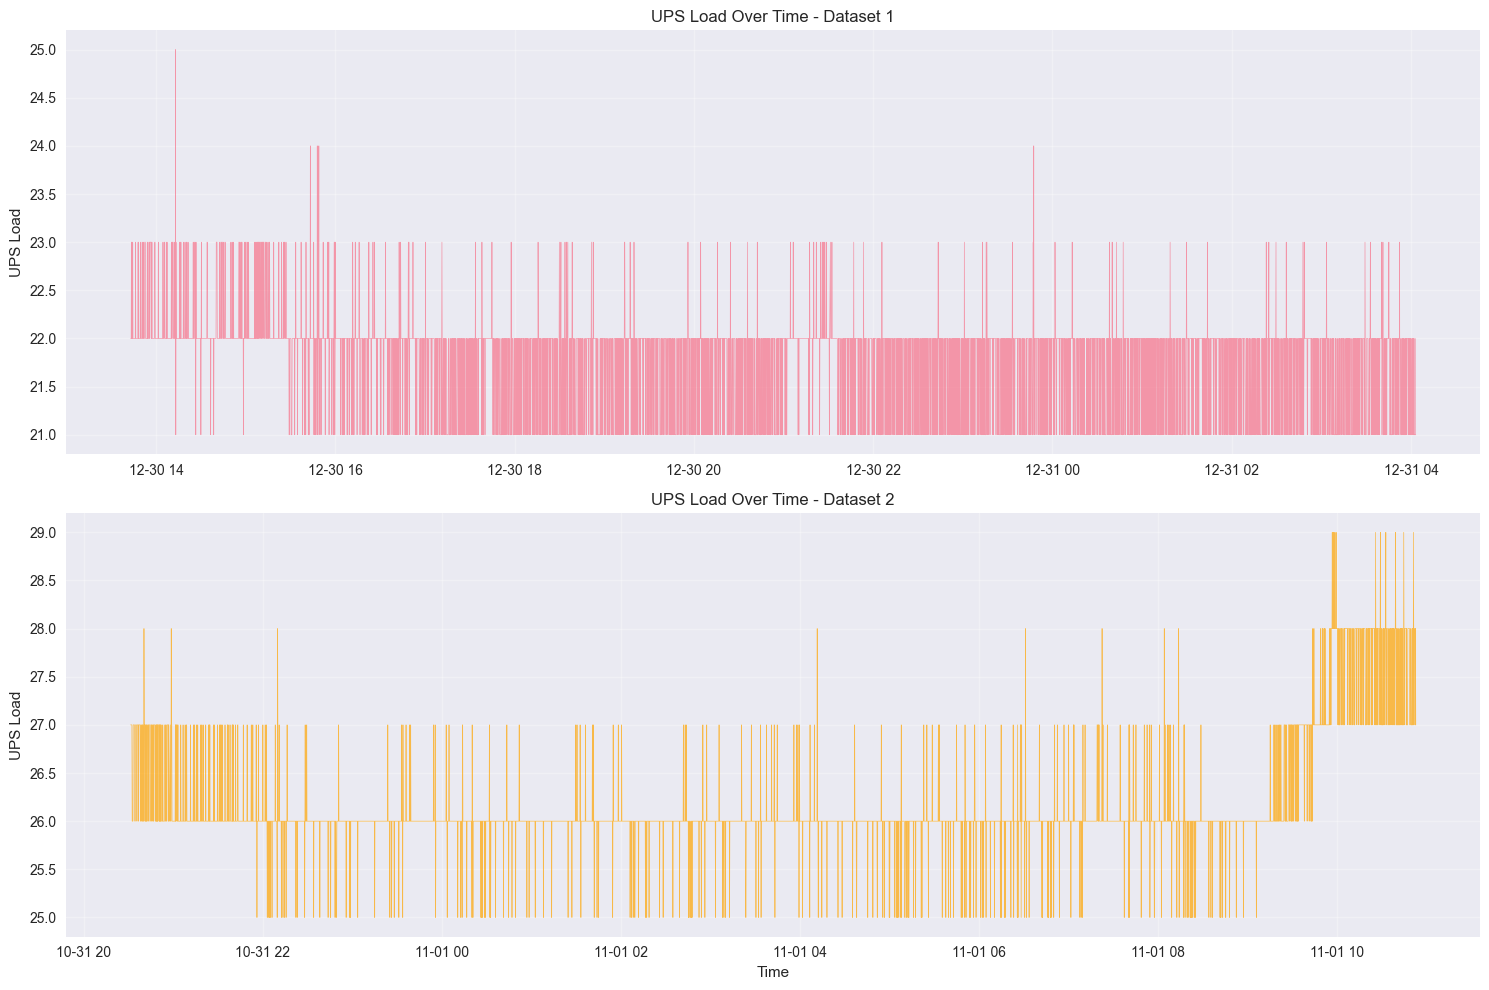

In [7]:
# Plot UPS load over time if available
if 'ups_load' in df1_sample.columns:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Dataset 1
    ax1.plot(df1_ts.index, df1_ts['ups_load'], alpha=0.7, linewidth=0.5)
    ax1.set_title('UPS Load Over Time - Dataset 1')
    ax1.set_ylabel('UPS Load')
    ax1.grid(True, alpha=0.3)
    
    # Dataset 2
    ax2.plot(df2_ts.index, df2_ts['ups_load'], alpha=0.7, linewidth=0.5, color='orange')
    ax2.set_title('UPS Load Over Time - Dataset 2')
    ax2.set_ylabel('UPS Load')
    ax2.set_xlabel('Time')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("UPS load column not found for plotting")

## Voltage Analysis

UPS Voltage columns: ['ups_va_in', 'ups_vb_in', 'ups_vc_in', 'ups_va_out', 'ups_vb_out', 'ups_vc_out']


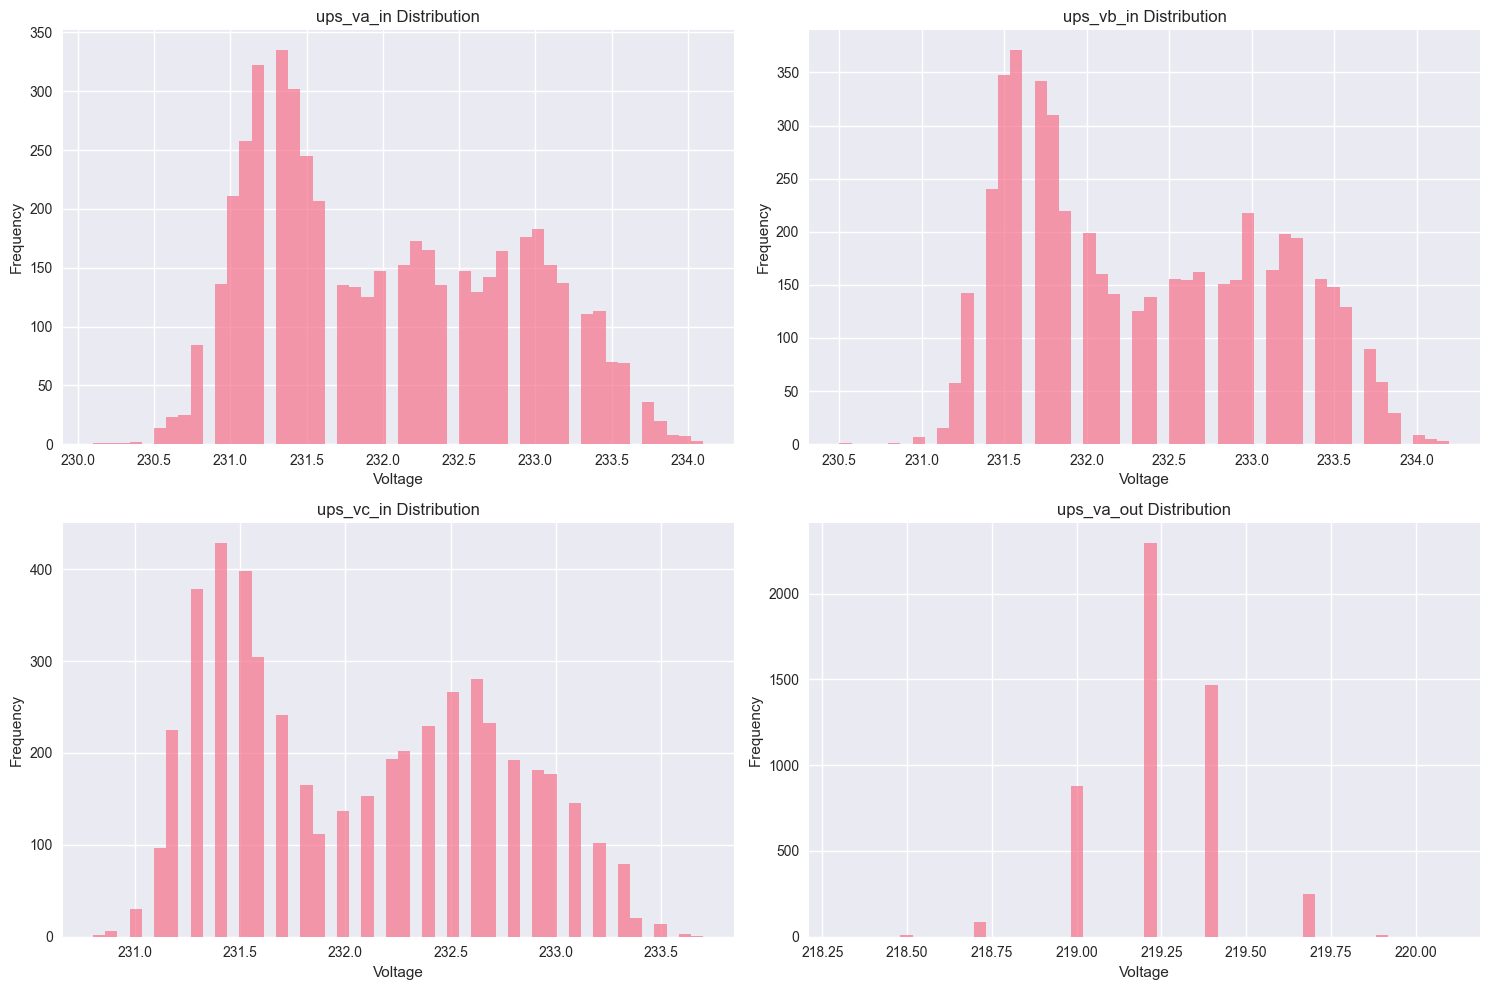


UPS Voltage Statistics:
         ups_va_in    ups_vb_in    ups_vc_in   ups_va_out   ups_vb_out  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    232.022420   232.348880   232.068020   219.240600   219.259420   
std       0.827162     0.756797     0.646439     0.190271     0.196497   
min     230.100000   230.500000   230.800000   218.300000   218.500000   
25%     231.300000   231.700000   231.500000   219.200000   219.200000   
50%     231.900000   232.200000   232.000000   219.200000   219.200000   
75%     232.700000   233.000000   232.600000   219.400000   219.400000   
max     234.100000   234.200000   233.700000   220.100000   219.900000   

        ups_vc_out  
count  5000.000000  
mean    219.897980  
std       0.210691  
min     219.200000  
25%     219.900000  
50%     219.900000  
75%     220.100000  
max     220.800000  


In [8]:
# Focus on UPS voltage metrics
ups_voltage_cols = [col for col in df1_sample.columns if col.startswith('ups_v')]

if ups_voltage_cols:
    print(f"UPS Voltage columns: {ups_voltage_cols}")
    
    # Plot voltage distributions
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(ups_voltage_cols[:4]):
        if i < len(axes):
            df1_sample[col].hist(bins=50, ax=axes[i], alpha=0.7)
            axes[i].set_title(f'{col} Distribution')
            axes[i].set_xlabel('Voltage')
            axes[i].set_ylabel('Frequency')
    
    # Hide unused subplots
    for i in range(len(ups_voltage_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Basic statistics
    print("\nUPS Voltage Statistics:")
    print(df1_sample[ups_voltage_cols].describe())
else:
    print("No UPS voltage columns found")

## Power Factor Analysis

Power Factor columns: ['met_fpa_1', 'met_fpb_1', 'met_fpc_1', 'met_fp_1', 'met_fpa_2', 'met_fpb_2', 'met_fpc_2', 'met_fp_2', 'pdu1_fp', 'pdu2_fp', 'pdu3_fp', 'pdu4_fp', 'pdu5_fp', 'pdu6_fp', 'pdu7_fp', 'pdu8_fp']


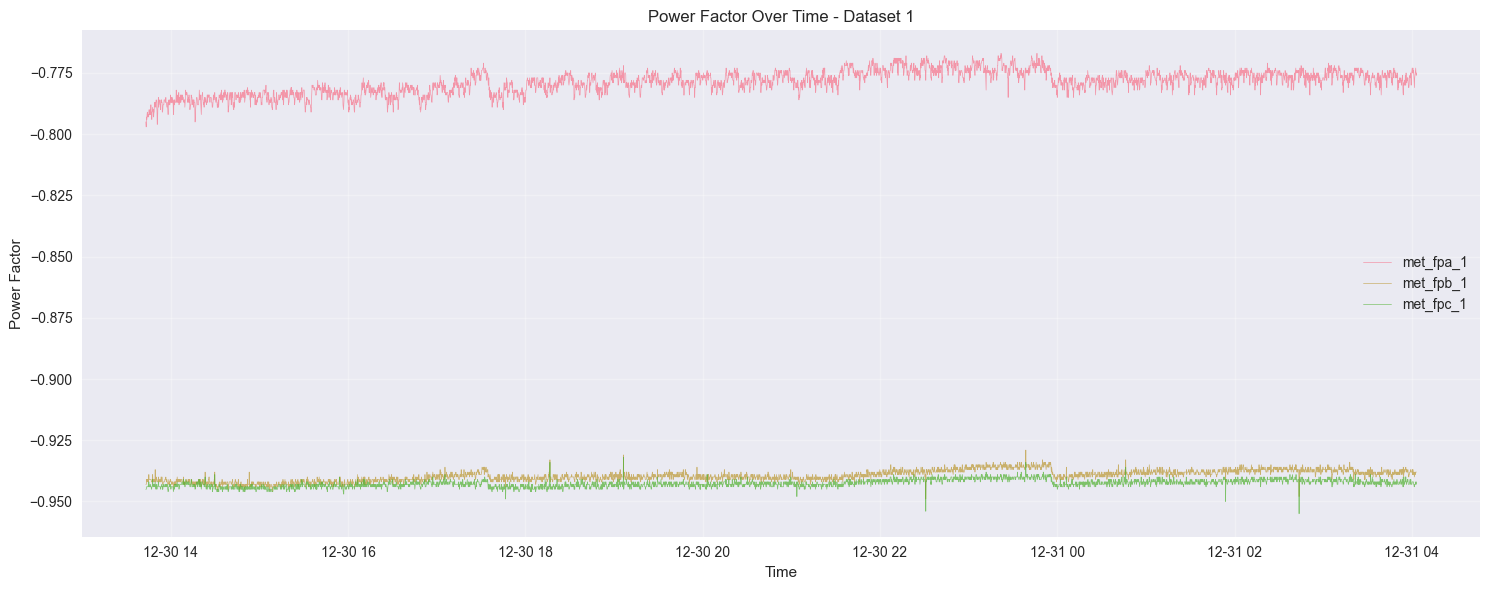


Power Factor Statistics:
         met_fpa_1    met_fpb_1    met_fpc_1     met_fp_1    met_fpa_2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     -0.778846    -0.939471    -0.942615    -0.853247    -0.924752   
std       0.004701     0.002179     0.001488     0.003522     0.001851   
min      -0.797000    -0.949000    -0.955000    -0.867000    -0.937000   
25%      -0.782000    -0.941000    -0.944000    -0.856000    -0.926000   
50%      -0.778000    -0.940000    -0.943000    -0.853000    -0.925000   
75%      -0.775000    -0.938000    -0.942000    -0.851000    -0.924000   
max      -0.767000    -0.929000    -0.932000    -0.844000    -0.917000   

         met_fpb_2    met_fpc_2     met_fp_2      pdu1_fp      pdu2_fp  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     -0.859491    -0.837294    -0.882633     0.851090     0.465732   
std       0.002528     0.002476     0.001605     0.013206     0.014071   
min      -0

In [9]:
# Look for power factor columns
pf_cols = [col for col in df1_sample.columns if 'fp' in col.lower()]

if pf_cols:
    print(f"Power Factor columns: {pf_cols}")
    
    # Plot power factor over time
    if len(pf_cols) > 0:
        plt.figure(figsize=(15, 6))
        
        for col in pf_cols[:3]:  # Plot first 3 power factor columns
            plt.plot(df1_ts.index, df1_ts[col], alpha=0.7, label=col, linewidth=0.5)
        
        plt.title('Power Factor Over Time - Dataset 1')
        plt.ylabel('Power Factor')
        plt.xlabel('Time')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print("\nPower Factor Statistics:")
        print(df1_sample[pf_cols].describe())
else:
    print("No power factor columns found")

## Energy Consumption Analysis

Energy columns: ['met_kwh_1', 'met_kwh_month_1', 'met_kwh_jan_1', 'met_kwh_feb_1', 'met_kwh_mar_1', 'met_kwh_apr_1', 'met_kwh_may_1', 'met_kwh_jun_1', 'met_kwh_jul_1', 'met_kwh_aug_1', 'met_kwh_set_1', 'met_kwh_oct_1', 'met_kwh_nov_1', 'met_kwh_dec_1', 'met_kwh_y_1', 'met_kwh_1y_1', 'met_kwh_2', 'met_kwh_month_2', 'met_kwh_jan_2', 'met_kwh_feb_2', 'met_kwh_mar_2', 'met_kwh_apr_2', 'met_kwh_may_2', 'met_kwh_jun_2', 'met_kwh_jul_2', 'met_kwh_aug_2', 'met_kwh_set_2', 'met_kwh_oct_2', 'met_kwh_nov_2', 'met_kwh_dec_2', 'met_kwh_y_2', 'met_kwh_1y_2', 'pdu1_kwh', 'pdu2_kwh', 'pdu3_kwh', 'pdu4_kwh', 'pdu5_kwh', 'pdu6_kwh', 'pdu7_kwh', 'pdu8_kwh']


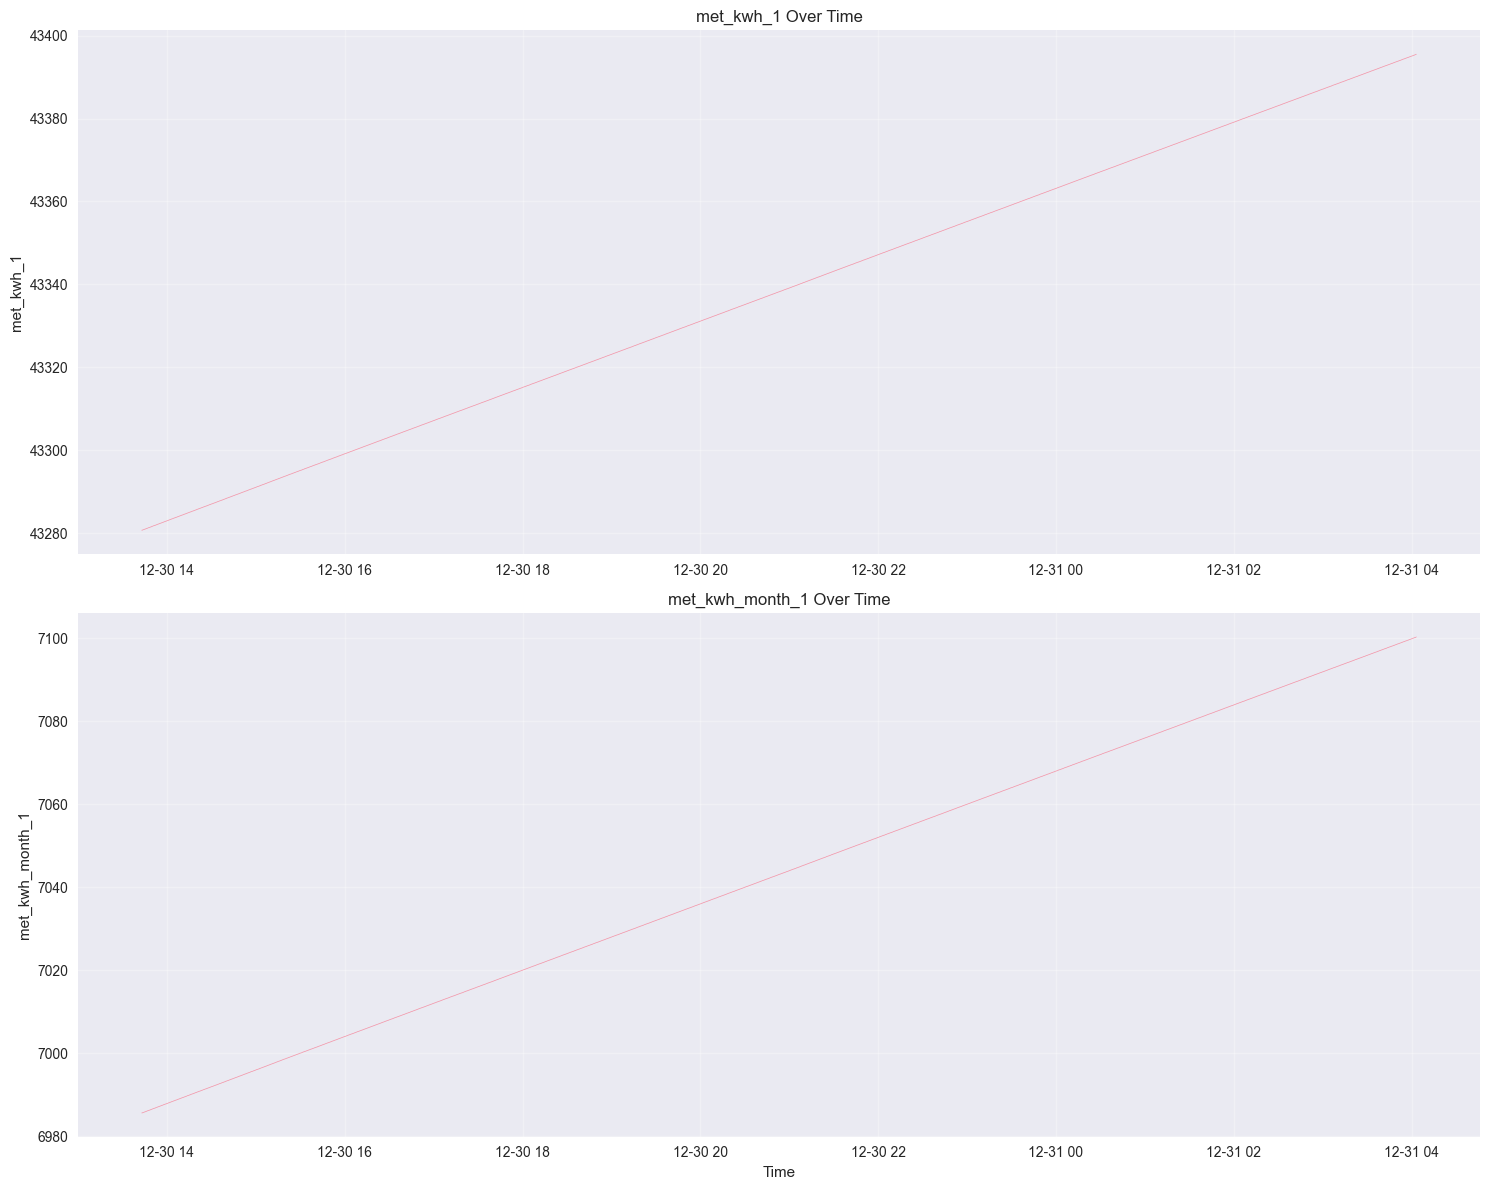


Energy Statistics:
          met_kwh_1  met_kwh_month_1  met_kwh_jan_1  met_kwh_feb_1  \
count   5000.000000      5000.000000   5.000000e+03         5000.0   
mean   43338.201840      7043.054750   6.445800e+03         6712.9   
std       33.114707        33.114821   9.095857e-13            0.0   
min    43280.750000      6985.600000   6.445800e+03         6712.9   
25%    43309.550000      7014.400000   6.445800e+03         6712.9   
50%    43338.200000      7043.075000   6.445800e+03         6712.9   
75%    43366.900000      7071.750000   6.445800e+03         6712.9   
max    43395.500000      7100.350000   6.445800e+03         6712.9   

       met_kwh_mar_1  met_kwh_apr_1  met_kwh_may_1  met_kwh_jun_1  \
count   5.000000e+03   5.000000e+03   5.000000e+03   5.000000e+03   
mean    5.793900e+03   5.157400e+03   4.943600e+03   3.803850e+03   
std     9.095857e-13   9.095857e-13   9.095857e-13   4.547928e-13   
min     5.793900e+03   5.157400e+03   4.943600e+03   3.803850e+03   
25% 

In [10]:
# Look for energy/consumption columns
energy_cols = [col for col in df1_sample.columns if any(keyword in col.lower() 
                                                       for keyword in ['kwh', 'energy', 'consumption'])]

if energy_cols:
    print(f"Energy columns: {energy_cols}")
    
    # Plot energy consumption over time
    fig, axes = plt.subplots(min(2, len(energy_cols)), 1, figsize=(15, 6*min(2, len(energy_cols))))
    if len(energy_cols) == 1:
        axes = [axes]
    
    for i, col in enumerate(energy_cols[:2]):
        if i < len(axes):
            axes[i].plot(df1_ts.index, df1_ts[col], alpha=0.7, linewidth=0.5)
            axes[i].set_title(f'{col} Over Time')
            axes[i].set_ylabel(col)
            axes[i].grid(True, alpha=0.3)
    
    if len(energy_cols) > 1:
        axes[-1].set_xlabel('Time')
    else:
        axes[0].set_xlabel('Time')
    
    plt.tight_layout()
    plt.show()
    
    print("\nEnergy Statistics:")
    print(df1_sample[energy_cols].describe())
else:
    print("No energy columns found")

## Dataset Comparison

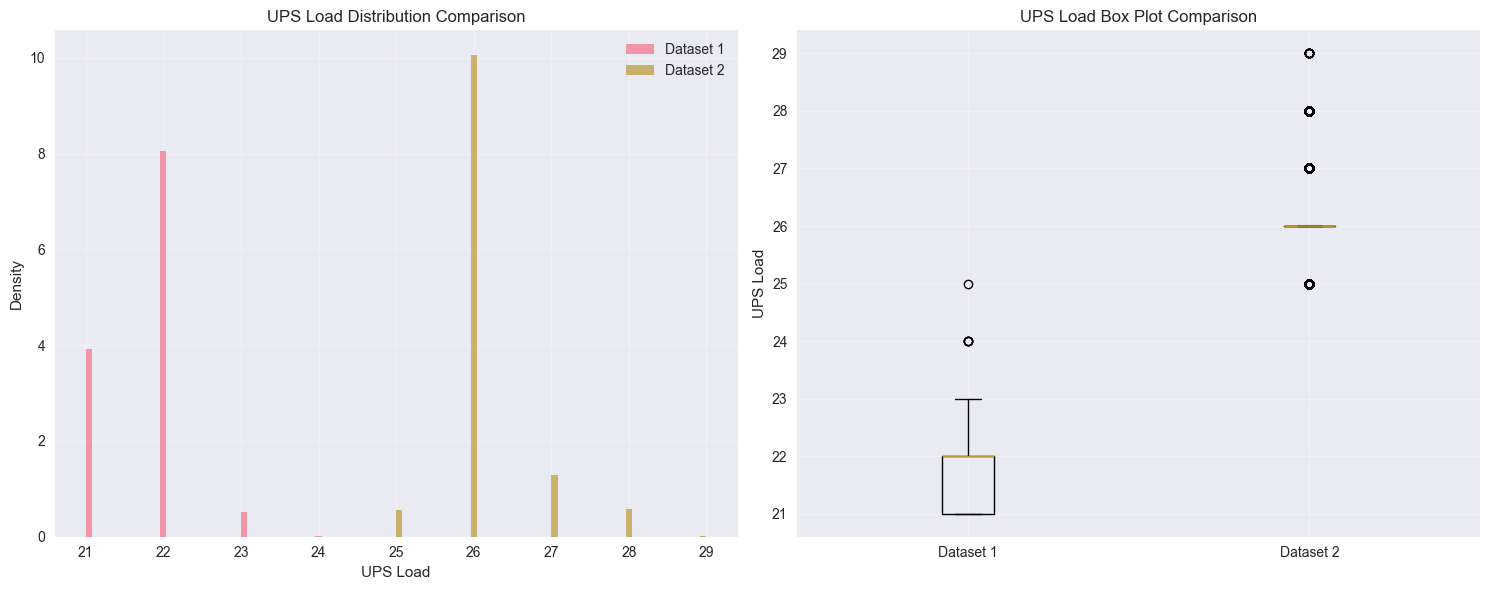

UPS Load Statistics Comparison:
Dataset 1:
count    5000.000000
mean       21.730800
std         0.535527
min        21.000000
25%        21.000000
50%        22.000000
75%        22.000000
max        25.000000
Name: ups_load, dtype: float64

Dataset 2:
count    5000.000000
mean       26.157400
std         0.570167
min        25.000000
25%        26.000000
50%        26.000000
75%        26.000000
max        29.000000
Name: ups_load, dtype: float64


In [11]:
# Compare key metrics between datasets
if 'ups_load' in df1_sample.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Load comparison
    axes[0].hist(df1_sample['ups_load'], bins=50, alpha=0.7, label='Dataset 1', density=True)
    axes[0].hist(df2_sample['ups_load'], bins=50, alpha=0.7, label='Dataset 2', density=True)
    axes[0].set_title('UPS Load Distribution Comparison')
    axes[0].set_xlabel('UPS Load')
    axes[0].set_ylabel('Density')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Box plot comparison
    data_to_plot = [df1_sample['ups_load'].dropna(), df2_sample['ups_load'].dropna()]
    axes[1].boxplot(data_to_plot, labels=['Dataset 1', 'Dataset 2'])
    axes[1].set_title('UPS Load Box Plot Comparison')
    axes[1].set_ylabel('UPS Load')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical comparison
    print("UPS Load Statistics Comparison:")
    print("Dataset 1:")
    print(df1_sample['ups_load'].describe())
    print("\nDataset 2:")
    print(df2_sample['ups_load'].describe())

## Summary and Key Insights

In [12]:
print("=== DATA EXPLORATION SUMMARY ===")
print(f"\n📊 Basic Information:")
print(f"  • Dataset 1: {df1_sample.shape[0]:,} rows (sample), {df1_sample.shape[1]} columns")
print(f"  • Dataset 2: {df2_sample.shape[0]:,} rows (sample), {df2_sample.shape[1]} columns")
print(f"  • Data types: Mostly numeric with datetime stamps")

print(f"\n⚡ Power System Components:")
print(f"  • UPS columns: {len(ups_cols)}")
print(f"  • Voltage columns: {len(voltage_cols)}")
print(f"  • Current columns: {len(current_cols)}")
print(f"  • Power columns: {len(power_cols)}")

print(f"\n📅 Time Coverage:")
print(f"  • Dataset 1: {df1_sample['datetime'].min().strftime('%Y-%m-%d')} to {df1_sample['datetime'].max().strftime('%Y-%m-%d')}")
print(f"  • Dataset 2: {df2_sample['datetime'].min().strftime('%Y-%m-%d')} to {df2_sample['datetime'].max().strftime('%Y-%m-%d')}")

if 'ups_load' in df1_sample.columns:
    print(f"\n🔋 Key Metrics (UPS Load):")
    print(f"  • Dataset 1 average load: {df1_sample['ups_load'].mean():.2f}")
    print(f"  • Dataset 2 average load: {df2_sample['ups_load'].mean():.2f}")
    print(f"  • Dataset 1 max load: {df1_sample['ups_load'].max():.2f}")
    print(f"  • Dataset 2 max load: {df2_sample['ups_load'].max():.2f}")

print(f"\n💡 Recommendations:")
print(f"  • Focus on UPS load patterns for system optimization")
print(f"  • Monitor voltage stability across all phases")
print(f"  • Analyze power factor trends for efficiency improvements")
print(f"  • Compare datasets for system performance changes over time")

=== DATA EXPLORATION SUMMARY ===

📊 Basic Information:
  • Dataset 1: 5,000 rows (sample), 166 columns
  • Dataset 2: 5,000 rows (sample), 166 columns
  • Data types: Mostly numeric with datetime stamps

⚡ Power System Components:
  • UPS columns: 39
  • Voltage columns: 27
  • Current columns: 26
  • Power columns: 24

📅 Time Coverage:
  • Dataset 1: 2024-12-30 to 2024-12-31
  • Dataset 2: 2024-10-31 to 2024-11-01

🔋 Key Metrics (UPS Load):
  • Dataset 1 average load: 21.73
  • Dataset 2 average load: 26.16
  • Dataset 1 max load: 25.00
  • Dataset 2 max load: 29.00

💡 Recommendations:
  • Focus on UPS load patterns for system optimization
  • Monitor voltage stability across all phases
  • Analyze power factor trends for efficiency improvements
  • Compare datasets for system performance changes over time
